results:  [[0.]
 [0.]
 [0.]
 ...
 [9.]
 [9.]
 [9.]] 

neighbours:  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [9. 9. 9.]
 [9. 9. 7.]
 [9. 9. 9.]] 

distances:  [[ 361955.  598018.  606136.]
 [ 790595.  959768. 1055851.]
 [ 534520.  641045.  681043.]
 ...
 [ 632329.  646093.  712409.]
 [ 464467.  784272.  872704.]
 [1315263. 1358024. 1463505.]]
91.64


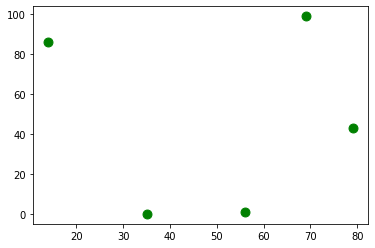

In [20]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_knn/py_knn_opencv/py_knn_opencv.html#knn-opencv
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

newcomer = np.random.randint(0,100,(5,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')


# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)
ret, results, neighbours, dist = knn.findNearest(test, 3)

print ("results: ", results,"\n")
print ("neighbours: ", neighbours,"\n")
print ("distances: ", dist)

# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = results==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/results.size
print(accuracy)


plt.show()